## 주성분 분석이란?
- 비지도 선형 변환 기법
- 새로운 특성 공간으로 데이터를 변환하거나 투영한다.
- 관련있는 정보를 유지하면서 데이터를 압축하는 방법
    - 저장 공간을 절약
    - 학습 알고리즘의 계산 효율성을 향상
    - 차원의 저주 문제 감소 -> 예측 성능 향상

- 고차원 데이터에서 분산이 가장 큰 방향을 찾고, 좀 더 작거나 같은 수의 차우너을 갖는 새로운 부분 공간으로 이를 투영한다.
- 새로운 부분 공간의 직교좌표(주성분)는 주어진 조건하에서 분산이 최대인 방향으로 해석할 수 있다.

- 모든 주성분은 다른 주성분들과 상관관계가 없다는 제약(직교)하에 가장 큰 분산을 가진다.
**- PCA방향은 데이터 스케일에 매우 민감하다. 따라서, 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리해야한다.**

### 절차
1) 데이터셋을 표준화 전처리한다.(d차원)  
2)* 공분산 행렬을 만든다.  
3) 공분산 행렬을 고유 벡터와 고윳값으로 분해한다.  
4) 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매긴다.  
5) 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다.(k<d)  
6) 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다.  
7) 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환한다.

2)*: 데이터의 구조를 잘 살리면서 차원을 감소시키기 위해서는 정사영 후 데이터 분포의 분산이 가장 큰 것(가장 많은 정보를 가지는)이 좋다.  
따라서, 공분산 행렬을 통해 선형변환할 때 주축에 정사영하는 것이 가장 좋다.

### wine 데이터셋을 활용한 예시

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                     'machine-learning-databases/wine/wine.data',
                     header=None)

In [5]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 1) & 2) 단계

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                    stratify=y,
                    random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

- 전처리 단계를 완료(1)한 뒤 공분산 행렬을 만든다.(2)
- 공분산 행렬은 d*d 차원의 대칭 행렬로 상호 간의 공분산을 저장한다.

In [20]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # np.cov는 특성이 열에 놓여 있음을 전제하므로 훈련 데이터를 전치해서 전달한다.
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값 \n%s' %eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


## 총 분산과 설명된 분산

- 새로운 특성 부분 공간으로 압축하여 줄여야 하기 때문에 가장 많은 정보(가장 큰 분산)를 가진 고유벡터 일부만 선택한다.
- 고윳값을 내림차순으로 정렬한 뒤 그 순서에 따라 최상위 k개의 고유 벡터를 선택한다.
- 가장 정보가 많은 k개의 고유 벡터를 선택하기 전에 고윳값의 설명된 분산 비율을 그래프로 그려본다.

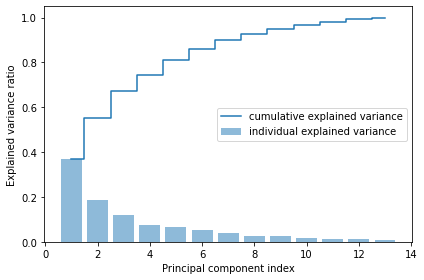

In [24]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- 첫 번째 주성분이 전체의 약 0.4, 두 번째까지의 주성분이 전체의 약 0.6을 설명한다.

### 특성 변환
#### 3) -  5)단계

In [27]:
# (고윳값, 고유 벡터) 튜플의 리스트를 만든다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
# 높은 값에서 낮은 값으로 (고윳값, 고유 벡터) 튜플을 정렬한다.
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

### 가장 큰 2개의 고윳값에 해당하는 고유 벡터를 선택한다. 이 데이터셋에 있는 분산의 약 60%를 잡아낼 수 있을 것이다.
- 이 예제에서는 시각화의 목적으로 2개만 선택한다. 실제 분석 시 계산 효율성과 모델 성능 사이 절충점을 찾아 결정하도록 한다.

In [30]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 w:\n', w)

투영 행렬 w:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


이 투영행렬을 사용하여 샘플x를(1*13) PCA의 부분 공간(두 개의 주성분)을 투영하여 x'를 얻을 수 있다.

In [31]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [34]:
# 마찬가지고 전체 124*13차원의 훈련 데이터셋을 행렬 점곱으로 두 개의 주성분으로 변환할 수 있다.

X_train_pca = X_train_std.dot(w)
X_train_pca[:5]

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979]])

## sklearn을 이용한 주성분 분석

In [35]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
